#IMPORTANTO OS DADOS E BIBLIOTECAS

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
passageiros = pd.read_csv("Passageiros.csv")

#Analizando os dados

In [8]:
#config para as imagens
mpl.rcParams['figure.figsize']= (10, 6)
mpl.rcParams['font.size'] = 22

<Axes: xlabel='tempo', ylabel='passageiros'>

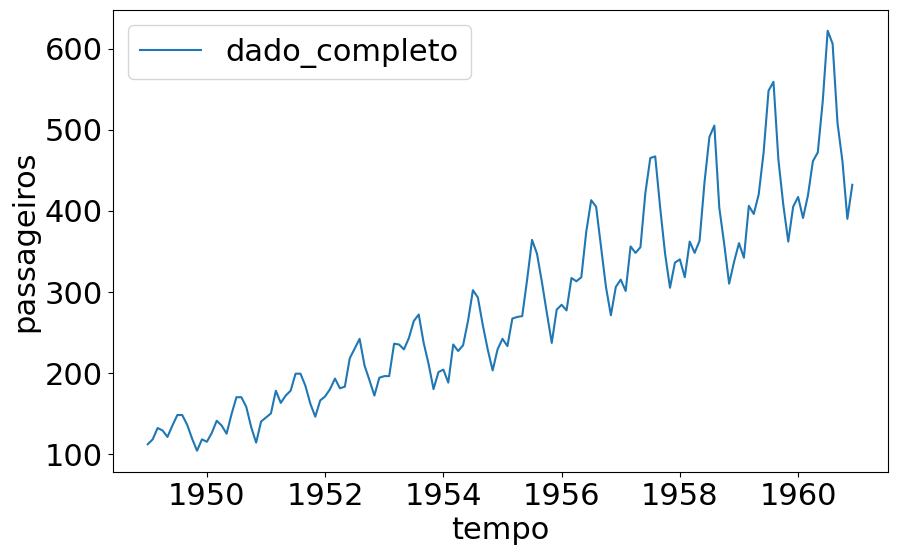

In [9]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')

In [10]:
sc = StandardScaler()

In [11]:
sc.fit(passageiros)

StandardScaler()

In [12]:
dado_escalado = sc.transform(passageiros)

In [13]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'Data')

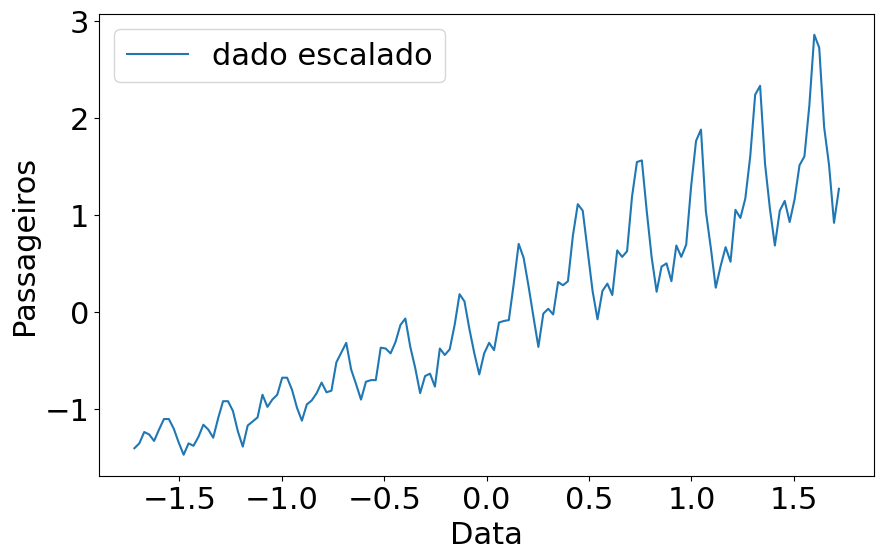

In [14]:
sns.lineplot(x=x, y=y, label= 'dado escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

#CRIANDO TREINO E TESTE

In [15]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)


#CRIANDO A REDE NEURAL PROFUNDA USANDO LINEARIDADE


Text(0.5, 0, 'Data')

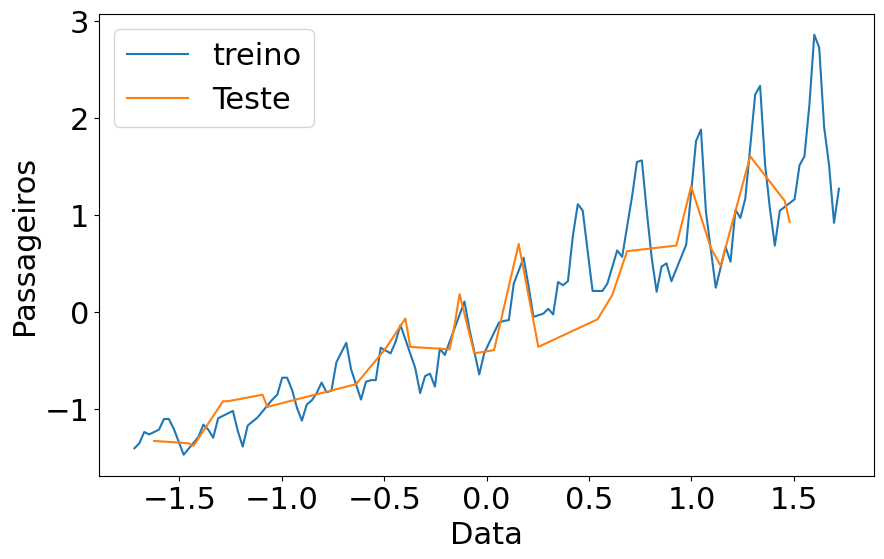

In [16]:
sns.lineplot(x=x_treino, y=y_treino, label= 'treino')
sns.lineplot(x=x_teste, y=y_teste, label= 'Teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [17]:
regressor = Sequential()


In [18]:
regressor.add(Dense(1, input_dim=1,kernel_initializer= "Ones", activation = "linear", use_bias=True))

In [19]:
regressor.compile(loss="mean_squared_error", optimizer='adam')

In [20]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
regressor.fit(x_treino,y_treino)

4/4 [==============================] - 1s 6ms/step - loss: 0.1594


In [22]:
y_predict = regressor.predict(x_treino)

4/4 [==============================] - 0s 4ms/step


<Axes: >

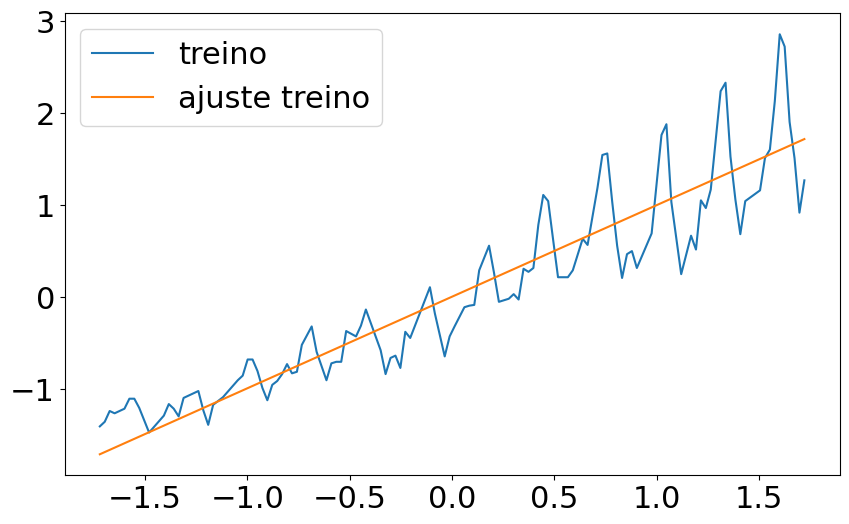

In [23]:
sns.lineplot(x= x_treino, y= y_treino, label= 'treino')
sns.lineplot(x= x_treino, y= y_predict[:,0], label= 'ajuste treino')

In [24]:
d = {'tempo': x_treino,
     'passageiros': y_predict[:,0]}

In [25]:
resultados = pd.DataFrame(data=d)

In [26]:
resultado_transf = sc.inverse_transform(resultados)

In [27]:
resultado_transf = pd.DataFrame(resultado_transf)

In [28]:
resultado_transf.columns = ['tempo', 'passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

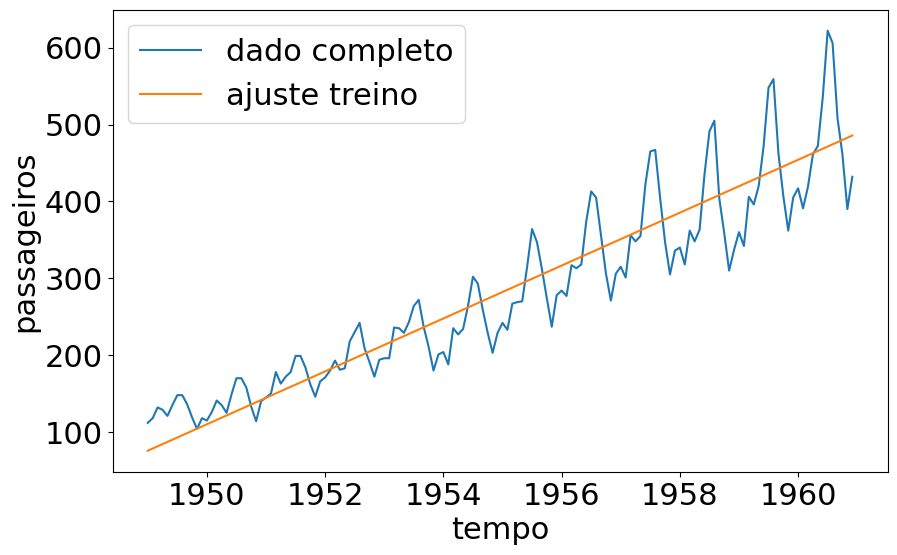

In [29]:
sns.lineplot(x= 'tempo', y= 'passageiros', data= passageiros, label= 'dado completo')
sns.lineplot(x= 'tempo', y= 'passageiros', data= resultado_transf, label= 'ajuste treino')

In [30]:
y_predict_teste = regressor.predict(x_teste)

1/1 [==============================] - 0s 30ms/step


In [31]:
d = {'tempo': x_teste, 'passageiros': y_predict_teste[:,0]}


In [32]:
resultados_teste = pd.DataFrame(data=d)

In [33]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [34]:
resultado_transf_teste=  pd.DataFrame(resultado_transf_teste)

In [35]:
resultado_transf_teste.columns = ['tempo', "passageiros"]

<Axes: xlabel='tempo', ylabel='passageiros'>

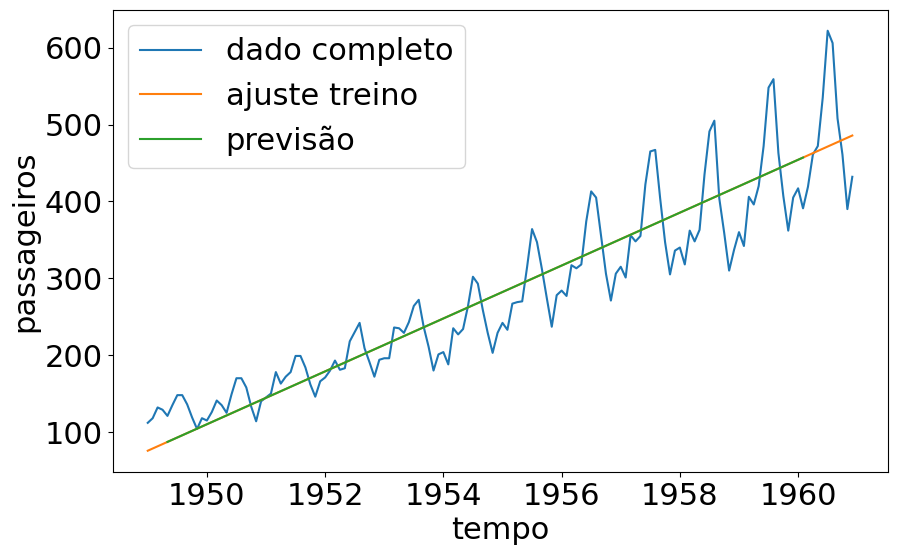

In [36]:
sns.lineplot(x= 'tempo', y= 'passageiros', data= passageiros, label= 'dado completo')
sns.lineplot(x= 'tempo', y= 'passageiros', data= resultado_transf, label= 'ajuste treino')
sns.lineplot(x= 'tempo', y= 'passageiros', data= resultado_transf_teste, label= 'previsão')

In [52]:
regressor2 = Sequential()

In [39]:
regressor2.add(Dense(8,input_dim=1, kernel_initializer='random_uniform', activation='linear', use_bias= True))

In [45]:
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='linear', use_bias=True))

In [46]:
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=True))

In [51]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 16        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
regressor2.compile(loss='mean_squared_error', optimizer="adam")

In [57]:
regressor2.fit(x_treino,y_treino, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1595
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1595
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1595
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1595
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1595
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 0.1595
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1595
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1595
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1595
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 0.1595
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1595
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1595
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

In [58]:
y_predict = regressor2.predict(x_treino)

4/4 [==============================] - 0s 4ms/step


In [60]:
y_predict_teste = regressor2.predict(x_teste)

1/1 [==============================] - 0s 77ms/step


<Axes: >

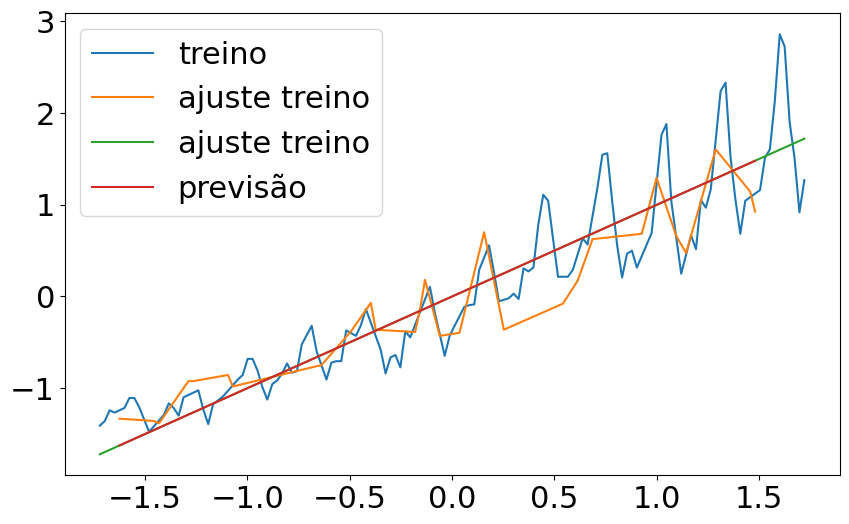

In [70]:
sns.lineplot(x= x_treino, y= y_treino, label= 'treino')
sns.lineplot(x= x_teste, y= y_teste,  label= 'ajuste treino')
sns.lineplot(x=x_treino, y=y_predict, label='ajuste treino')
sns.lineplot(x=x_teste, y=y_predict_teste, label='previsão')


#CRIANDO A REDE NEURAL PROFUNDA USANDO SIGMOIDE

In [72]:
regressor3 = Sequential()

In [73]:
regressor3.add(Dense(8,input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias= True))

In [74]:
regressor3.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=True))

In [75]:
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=True))

In [76]:
regressor3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 16        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
regressor3.compile(loss='mean_squared_error', optimizer="adam")

In [85]:
regressor3.fit(x_treino,y_treino, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.1485
Epoch 2/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1489
Epoch 3/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.1487
Epoch 4/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.1489
Epoch 5/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1487
Epoch 6/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.1486
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1485
Epoch 8/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.1486
Epoch 9/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.1486
Epoch 10/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1486
Epoch 11/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1487
Epoch 12/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1485
Epoch 13/1000
4/4 [==============================

In [100]:
y_predict = regressor3.predict(x_treino)

4/4 [==============================] - 0s 4ms/step


In [101]:
y_predict_teste = regressor3.predict(x_teste)

1/1 [==============================] - 0s 23ms/step


<Axes: >

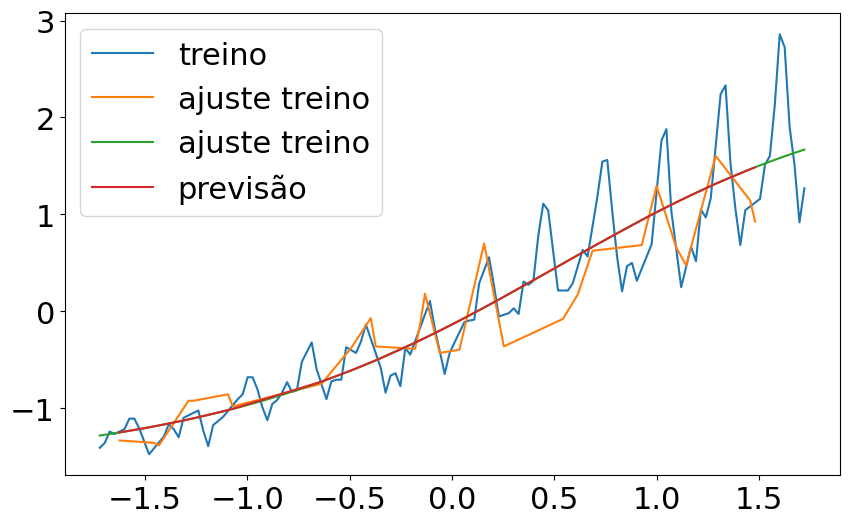

In [103]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='ajuste treino')
sns.lineplot(x=x_treino, y=y_predict[:,0], label='ajuste treino')
sns.lineplot(x=x_teste, y=y_predict_teste[:,0], label='previsão')